In [1]:
import spotipy
import json 
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import IFrame
import pandas as pd
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
c_id = "08aab399f58242f8a77024eac63f6184"
c_se = "1e610c19e0ad4ee99450eb67520d32b6"

In [3]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=c_id, client_secret=c_se))

In [ ]:
# # Getting details of playlist (by playlist id)

# def get_playlist_tracks(username, playlist_id):
#     results = sp.user_playlist_tracks(username,playlist_id,market="GB")
#     tracks = results['items']
#     while results['next']:
#         results = sp.next(results)
#         tracks.extend(results['items'])
#     return tracks
# playlist = get_playlist_tracks("spotify", "5hphFkVZFFNXlhAuqUuVLA")

In [111]:
# Function for everything

# def songs_df(playlist):
#     ids = []
#     titles = []
#     artists = []
#     features = []
    
#     try: 
#         for i in range(len(playlist)):
#             ids.append(playlist[i]["track"]["id"]) #getting track ids
#     except:
#         pass 
    
#     for i in ids:
#         titles.append((sp.track(i)["name"])) # getting titles by ids
   
#     for i in ids: 
#         multiple_artists = []
#         for j in sp.track(i)["artists"]:
#             multiple_artists.append(j["name"])
#         artists.append(", ".join(multiple_artists)) # getting artists by ids
        
    
#     for i in ids:
#         features.append(sp.audio_features(i)[0]) # getting features by ids
        
#     playlist_df = pd.DataFrame({"artist": artists, "title":titles, "id":ids})
#     features_df = pd.DataFrame.from_dict(features)
#     final_df = pd.merge(playlist_df, features_df, on="id")
#     final_df = final_df.drop_duplicates()
#     final_df.reset_index(drop=True)
#     final_df.to_csv('songs_df.csv', mode='a', header=False, index=False)    
    

# songs_df(playlist)

In [4]:

aa = pd.read_csv("songs_df.csv")

In [5]:
aa

,artist,title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Pharrell Williams,"Happy - From ""Despicable Me 2""",60nZcImufyMA1MKQY3dcCH,0.647,0.822,5,-4.662,0,0.1830,0.219000,0.000000,0.0908,0.962,160.019,audio_features,spotify:track:60nZcImufyMA1MKQY3dcCH,https://api.spotify.com/v1/tracks/60nZcImufyMA...,https://api.spotify.com/v1/audio-analysis/60nZ...,232720,4
1,"Mark Ronson, Bruno Mars",Uptown Funk (feat. Bruno Mars),32OlwWuMpZ6b0aN2RZOeMS,0.856,0.609,0,-7.223,1,0.0824,0.008010,0.000082,0.0344,0.928,114.988,audio_features,spotify:track:32OlwWuMpZ6b0aN2RZOeMS,https://api.spotify.com/v1/tracks/32OlwWuMpZ6b...,https://api.spotify.com/v1/audio-analysis/32Ol...,269667,4
2,"Daft Punk, Pharrell Williams, Nile Rodgers",Get Lucky (feat. Pharrell Williams & Nile Rodg...,2Foc5Q5nqNiosCNqttzHof,0.794,0.811,6,-8.966,0,0.0380,0.042600,0.000001,0.1010,0.862,116.047,audio_features,spotify:track:2Foc5Q5nqNiosCNqttzHof,https://api.spotify.com/v1/tracks/2Foc5Q5nqNio...,https://api.spotify.com/v1/audio-analysis/2Foc...,248413,4
3,MAGIC!,Rude,3tCwjWLicbjsMCvXhN0WOE,0.743,0.807,1,-3.780,1,0.0364,0.043500,0.000000,0.3090,0.899,144.062,audio_features,spotify:track:3tCwjWLicbjsMCvXhN0WOE,https://api.spotify.com/v1/tracks/3tCwjWLicbjs...,https://api.spotify.com/v1/audio-analysis/3tCw...,224773,4
4,"The Script, will.i.am",Hall of Fame (feat. will.i.am),7wMq5n8mYSKlQIGECKUgTX,0.421,0.873,10,-4.343,1,0.0564,0.065400,0.000000,0.1230,0.629,84.786,audio_features,spotify:track:7wMq5n8mYSKlQIGECKUgTX,https://api.spotify.com/v1/tracks/7wMq5n8mYSKl...,https://api.spotify.com/v1/audio-analysis/7wMq...,202533,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,The Kinks,You Really Got Me - Mono Mix,29SyMC0plk6qw8NMF7lfRL,0.573,0.939,8,-6.441,1,0.0808,0.493000,0.000000,0.0994,0.963,137.382,audio_features,spotify:track:29SyMC0plk6qw8NMF7lfRL,https://api.spotify.com/v1/tracks/29SyMC0plk6q...,https://api.spotify.com/v1/audio-analysis/29Sy...,134253,4
460,Mötley Crüe,"Girls, Girls, Girls",549Go7a66CX6k523uK9kUv,0.599,0.931,7,-4.653,1,0.0735,0.030200,0.000067,0.3920,0.536,140.123,audio_features,spotify:track:549Go7a66CX6k523uK9kUv,https://api.spotify.com/v1/tracks/549Go7a66CX6...,https://api.spotify.com/v1/audio-analysis/549G...,270427,4
461,Blondie,Call Me,4qO03RMQm88DdpTJcxlglY,0.560,0.825,2,-6.711,0,0.0347,0.000785,0.002460,0.0892,0.740,142.669,audio_features,spotify:track:4qO03RMQm88DdpTJcxlglY,https://api.spotify.com/v1/tracks/4qO03RMQm88D...,https://api.spotify.com/v1/audio-analysis/4qO0...,212600,4
462,Sum 41,In Too Deep,1HNE2PX70ztbEl6MLxrpNL,0.568,0.844,9,-5.875,1,0.0505,0.000189,0.000000,0.0607,0.766,116.046,audio_features,spotify:track:1HNE2PX70ztbEl6MLxrpNL,https://api.spotify.com/v1/tracks/1HNE2PX70ztb...,https://api.spotify.com/v1/audio-analysis/1HNE...,207093,4


In [123]:
#aa == aa.drop_duplicates(inplace=True)

,artist,title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15926,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15927,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15928,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15929,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [127]:
aa=aa.reset_index(drop=True)

In [128]:
aa.to_csv("songs_df.csv")

In [141]:
aa[aa['time_signature']==1]

,title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
414,Meditation: Méditation from Thaïs,7pgJTa3eZM4kkT2vsZUmFt,0.114,0.0701,4,-23.417,0,0.0445,0.870000,0.431000,0.0916,0.0371,89.330,audio_features,spotify:track:7pgJTa3eZM4kkT2vsZUmFt,https://api.spotify.com/v1/tracks/7pgJTa3eZM4k...,https://api.spotify.com/v1/audio-analysis/7pgJ...,331933,1
772,A Fool for Your Stockings,5sJEntK68Ecj0S61k41zQ8,0.835,0.4490,7,-14.652,1,0.0618,0.018900,0.003040,0.0609,0.5440,114.592,audio_features,spotify:track:5sJEntK68Ecj0S61k41zQ8,https://api.spotify.com/v1/tracks/5sJEntK68Ecj...,https://api.spotify.com/v1/audio-analysis/5sJE...,254093,1
822,Delilah,2v8B8d17Xxu9uLU5sNiHSL,0.528,0.4820,9,-10.939,0,0.0270,0.614000,0.000000,0.5490,0.7880,95.820,audio_features,spotify:track:2v8B8d17Xxu9uLU5sNiHSL,https://api.spotify.com/v1/tracks/2v8B8d17Xxu9...,https://api.spotify.com/v1/audio-analysis/2v8B...,204160,1
1204,"My Heart Will Go On - Love Theme from ""Titanic""",33LC84JgLvK2KuW43MfaNq,0.428,0.2760,4,-11.729,1,0.0312,0.732000,0.000005,0.1170,0.0382,99.195,audio_features,spotify:track:33LC84JgLvK2KuW43MfaNq,https://api.spotify.com/v1/tracks/33LC84JgLvK2...,https://api.spotify.com/v1/audio-analysis/33LC...,280000,1
2877,Nuttah,1nU2BL9wUyOfvtd1Leaonj,0.652,0.9090,1,-5.151,1,0.0722,0.000783,0.544000,0.1370,0.5080,98.487,audio_features,spotify:track:1nU2BL9wUyOfvtd1Leaonj,https://api.spotify.com/v1/tracks/1nU2BL9wUyOf...,https://api.spotify.com/v1/audio-analysis/1nU2...,331880,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12007,La Bruja,4hM0H2SupXsTkcQnSchNz5,0.478,0.4760,8,-9.102,0,0.0331,0.496000,0.000003,0.0571,0.8630,83.688,audio_features,spotify:track:4hM0H2SupXsTkcQnSchNz5,https://api.spotify.com/v1/tracks/4hM0H2SupXsT...,https://api.spotify.com/v1/audio-analysis/4hM0...,268000,1
12306,Gotta Stay Focussed,3Pw9oBbkb9kDLuUfa6Qos9,0.477,0.6470,8,-6.422,1,0.2740,0.010500,0.000000,0.1050,0.5740,84.591,audio_features,spotify:track:3Pw9oBbkb9kDLuUfa6Qos9,https://api.spotify.com/v1/tracks/3Pw9oBbkb9kD...,https://api.spotify.com/v1/audio-analysis/3Pw9...,192000,1
12816,Lucy In The Sky With Diamonds - Remastered 2009,25yQPHgC35WNnnOUqFhgVR,0.311,0.3250,2,-9.042,1,0.0283,0.046900,0.000000,0.1390,0.6680,65.090,audio_features,spotify:track:25yQPHgC35WNnnOUqFhgVR,https://api.spotify.com/v1/tracks/25yQPHgC35WN...,https://api.spotify.com/v1/audio-analysis/25yQ...,208467,1
12830,Bad To The Bone,6s0NHplywwr1IjnQpUpWJk,0.459,0.7270,0,-11.777,1,0.0303,0.006140,0.065200,0.3840,0.9550,149.231,audio_features,spotify:track:6s0NHplywwr1IjnQpUpWJk,https://api.spotify.com/v1/tracks/6s0NHplywwr1...,https://api.spotify.com/v1/audio-analysis/6s0N...,292173,1


In [143]:
IFrame(src="https://open.spotify.com/embed/track/"+'2v8B8d17Xxu9uLU5sNiHSL',
       width="320",
   
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

,title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Here For You,1QgebV92VO4Z7VxbQ1tSKo,0.358,0.780,11,-3.400,0,0.0447,0.175000,0.000620,0.2650,0.0402,173.917,audio_features,spotify:track:1QgebV92VO4Z7VxbQ1tSKo,https://api.spotify.com/v1/tracks/1QgebV92VO4Z...,https://api.spotify.com/v1/audio-analysis/1Qge...,226207,4
1,Where Did You Go? (feat. MNEK),3sa06xVNmLLYIxdNNmVQN8,0.763,0.782,7,-4.541,0,0.0346,0.182000,0.000007,0.2930,0.5020,127.034,audio_features,spotify:track:3sa06xVNmLLYIxdNNmVQN8,https://api.spotify.com/v1/tracks/3sa06xVNmLLY...,https://api.spotify.com/v1/audio-analysis/3sa0...,177689,4
2,The Parade,0B3H6se7MYo3D7BmzfvdVN,0.793,0.886,10,-5.071,0,0.0445,0.000755,0.878000,0.2960,0.2850,124.040,audio_features,spotify:track:0B3H6se7MYo3D7BmzfvdVN,https://api.spotify.com/v1/tracks/0B3H6se7MYo3...,https://api.spotify.com/v1/audio-analysis/0B3H...,158725,4
3,Still Sleepless,4vyG9ZhHT8MKJE5mTICMFC,0.628,0.738,6,-5.045,0,0.0367,0.015600,0.281000,0.1530,0.6990,125.928,audio_features,spotify:track:4vyG9ZhHT8MKJE5mTICMFC,https://api.spotify.com/v1/tracks/4vyG9ZhHT8MK...,https://api.spotify.com/v1/audio-analysis/4vyG...,162879,4
4,Make Me Feel Good,4CUX44NA1CPEzd0ibMLQsL,0.773,0.740,7,-8.169,0,0.0386,0.062700,0.001830,0.0829,0.5040,124.014,audio_features,spotify:track:4CUX44NA1CPEzd0ibMLQsL,https://api.spotify.com/v1/tracks/4CUX44NA1CPE...,https://api.spotify.com/v1/audio-analysis/4CUX...,197473,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13042,In Your Eyes,1wyluqXP2ujdTpCfm1E617,0.622,0.713,11,-7.253,0,0.0357,0.070200,0.000003,0.1040,0.6390,89.448,audio_features,spotify:track:1wyluqXP2ujdTpCfm1E617,https://api.spotify.com/v1/tracks/1wyluqXP2ujd...,https://api.spotify.com/v1/audio-analysis/1wyl...,327947,4
13043,Black Betty,2ZOTtG7v1OrSNs6EINIGb4,0.465,0.865,11,-9.573,0,0.0980,0.018000,0.001350,0.0769,0.6770,117.528,audio_features,spotify:track:2ZOTtG7v1OrSNs6EINIGb4,https://api.spotify.com/v1/tracks/2ZOTtG7v1OrS...,https://api.spotify.com/v1/audio-analysis/2ZOT...,237893,4
13044,Eye In The Sky,39qYD4J4BKvZMQgxfXl5bv,0.823,0.417,2,-12.643,1,0.0320,0.562000,0.000980,0.0765,0.5220,111.928,audio_features,spotify:track:39qYD4J4BKvZMQgxfXl5bv,https://api.spotify.com/v1/tracks/39qYD4J4BKvZ...,https://api.spotify.com/v1/audio-analysis/39qY...,276280,4
13045,Midnight Blue,4iQZi2sMZlbTpcUlo5YGBf,0.641,0.836,0,-7.155,1,0.0284,0.105000,0.033500,0.0714,0.6590,113.758,audio_features,spotify:track:4iQZi2sMZlbTpcUlo5YGBf,https://api.spotify.com/v1/tracks/4iQZi2sMZlbT...,https://api.spotify.com/v1/audio-analysis/4iQZ...,234693,4


In [7]:
newdf = pd.DataFrame(sp.audio_features('4bK2vKMdkS0rNhbzRqAZe0'))


In [9]:
newdf.drop(newdf[['type', 'uri','track_href','analysis_url','duration_ms','id']], axis=1, inplace=True)

In [10]:
newdf

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.505,0.759,7,-6.871,1,0.0303,0.00112,0.000365,0.168,0.65,128.63,4


<h2>Clustering</h2>

In [19]:
data = pd.read_csv('songs_df.csv')


In [21]:
#drop 1st columns
del data[data.columns[0]]

In [22]:
# drop categorical vars
data_num = data.drop(data[['type', 'uri','track_href','analysis_url','duration_ms','artist','title','id']], axis=1, inplace=False)

In [23]:
data_num['time_signature'].value_counts()


4    11986
3      803
5      170
1       85
0        3
Name: time_signature, dtype: int64

In [24]:
scaler = StandardScaler()
scaler.fit(data_num)
X_scaled = scaler.transform(newdf)
X_scaled_df = pd.DataFrame(X_scaled, columns = newdf.columns)
display(newdf.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.505,0.759,7,-6.871,1,0.0303,0.00112,0.000365,0.168,0.65,128.63,4


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,-0.477482,0.52119,0.486147,0.376201,0.794148,-0.68968,-0.856274,-0.516755,-0.117748,0.527774,0.238258,0.189771


In [7]:
kmeans = KMeans(random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(random_state=1234)

In [8]:
kmeans.labels_

array([1, 7, 1, ..., 6, 3, 3])

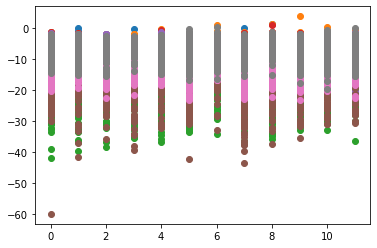

In [9]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(data_num.to_numpy()[row_ix, 2], data_num.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [10]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    1422
1    1767
2     922
3    3469
4     704
5     604
6    1574
7    2585
dtype: int64

In [11]:
#X_df = pd.DataFrame(X)
X_scaled_df["cluster"] = clusters


In [21]:
X_scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,-1.288029,0.601758,1.602289,0.978594,-1.259211,-0.546765,-0.338674,-0.515943,0.508802,-1.790943,1.739087,0.189771,1
1,0.945112,0.609431,0.486147,0.780573,-1.259211,-0.647004,-0.317836,-0.517896,0.689662,-0.034984,0.185366,0.189771,7
2,1.110530,1.008435,1.323254,0.688591,-1.259211,-0.548750,-0.857360,2.280463,0.709040,-0.860110,0.086144,0.189771,1
3,0.200732,0.440622,0.207111,0.693104,-1.259211,-0.626162,-0.813170,0.377691,-0.214637,0.714093,0.148713,0.189771,7
4,1.000251,0.448295,0.486147,0.150932,-1.259211,-0.607306,-0.672964,-0.512086,-0.667432,-0.027380,0.085282,0.189771,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13042,0.167648,0.344708,1.602289,0.309904,-1.259211,-0.636087,-0.650639,-0.517909,-0.531141,0.485947,-1.060249,0.189771,7
13043,-0.698039,0.927867,1.602289,-0.092733,-1.259211,-0.017781,-0.806026,-0.513616,-0.706188,0.630439,-0.129667,0.189771,7
13044,1.275948,-0.790918,-0.909031,-0.625533,0.794148,-0.672808,0.813334,-0.514795,-0.708771,0.041064,-0.315253,0.189771,6
13045,0.272413,0.816606,-1.467102,0.326912,0.794148,-0.708537,-0.547047,-0.411147,-0.741714,0.561996,-0.254606,0.189771,3


In [ ]:
Database_clustered = pd.merge(X_scaled_df, data, on="id")

In [24]:
data

,artist,title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,"Wilkinson, Becky Hill",Here For You,1QgebV92VO4Z7VxbQ1tSKo,0.358,0.780,11,-3.400,0,0.0447,0.175000,0.000620,0.2650,0.0402,173.917,audio_features,spotify:track:1QgebV92VO4Z7VxbQ1tSKo,https://api.spotify.com/v1/tracks/1QgebV92VO4Z...,https://api.spotify.com/v1/audio-analysis/1Qge...,226207,4
1,"Jax Jones, MNEK",Where Did You Go? (feat. MNEK),3sa06xVNmLLYIxdNNmVQN8,0.763,0.782,7,-4.541,0,0.0346,0.182000,0.000007,0.2930,0.5020,127.034,audio_features,spotify:track:3sa06xVNmLLYIxdNNmVQN8,https://api.spotify.com/v1/tracks/3sa06xVNmLLY...,https://api.spotify.com/v1/audio-analysis/3sa0...,177689,4
2,"Joel Corry, Da Hool",The Parade,0B3H6se7MYo3D7BmzfvdVN,0.793,0.886,10,-5.071,0,0.0445,0.000755,0.878000,0.2960,0.2850,124.040,audio_features,spotify:track:0B3H6se7MYo3D7BmzfvdVN,https://api.spotify.com/v1/tracks/0B3H6se7MYo3...,https://api.spotify.com/v1/audio-analysis/0B3H...,158725,4
3,"D.O.D, Carla Monroe",Still Sleepless,4vyG9ZhHT8MKJE5mTICMFC,0.628,0.738,6,-5.045,0,0.0367,0.015600,0.281000,0.1530,0.6990,125.928,audio_features,spotify:track:4vyG9ZhHT8MKJE5mTICMFC,https://api.spotify.com/v1/tracks/4vyG9ZhHT8MK...,https://api.spotify.com/v1/audio-analysis/4vyG...,162879,4
4,"Belters Only, Jazzy",Make Me Feel Good,4CUX44NA1CPEzd0ibMLQsL,0.773,0.740,7,-8.169,0,0.0386,0.062700,0.001830,0.0829,0.5040,124.014,audio_features,spotify:track:4CUX44NA1CPEzd0ibMLQsL,https://api.spotify.com/v1/tracks/4CUX44NA1CPE...,https://api.spotify.com/v1/audio-analysis/4CUX...,197473,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13042,Peter Gabriel,In Your Eyes,1wyluqXP2ujdTpCfm1E617,0.622,0.713,11,-7.253,0,0.0357,0.070200,0.000003,0.1040,0.6390,89.448,audio_features,spotify:track:1wyluqXP2ujdTpCfm1E617,https://api.spotify.com/v1/tracks/1wyluqXP2ujd...,https://api.spotify.com/v1/audio-analysis/1wyl...,327947,4
13043,Ram Jam,Black Betty,2ZOTtG7v1OrSNs6EINIGb4,0.465,0.865,11,-9.573,0,0.0980,0.018000,0.001350,0.0769,0.6770,117.528,audio_features,spotify:track:2ZOTtG7v1OrSNs6EINIGb4,https://api.spotify.com/v1/tracks/2ZOTtG7v1OrS...,https://api.spotify.com/v1/audio-analysis/2ZOT...,237893,4
13044,The Alan Parsons Project,Eye In The Sky,39qYD4J4BKvZMQgxfXl5bv,0.823,0.417,2,-12.643,1,0.0320,0.562000,0.000980,0.0765,0.5220,111.928,audio_features,spotify:track:39qYD4J4BKvZMQgxfXl5bv,https://api.spotify.com/v1/tracks/39qYD4J4BKvZ...,https://api.spotify.com/v1/audio-analysis/39qY...,276280,4
13045,Lou Gramm,Midnight Blue,4iQZi2sMZlbTpcUlo5YGBf,0.641,0.836,0,-7.155,1,0.0284,0.105000,0.033500,0.0714,0.6590,113.758,audio_features,spotify:track:4iQZi2sMZlbTpcUlo5YGBf,https://api.spotify.com/v1/tracks/4iQZi2sMZlbT...,https://api.spotify.com/v1/audio-analysis/4iQZ...,234693,4


In [13]:
kmeans.inertia_

81754.28922123558

In [14]:
kmeans2 = KMeans(n_clusters=8,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

81754.04282481251


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

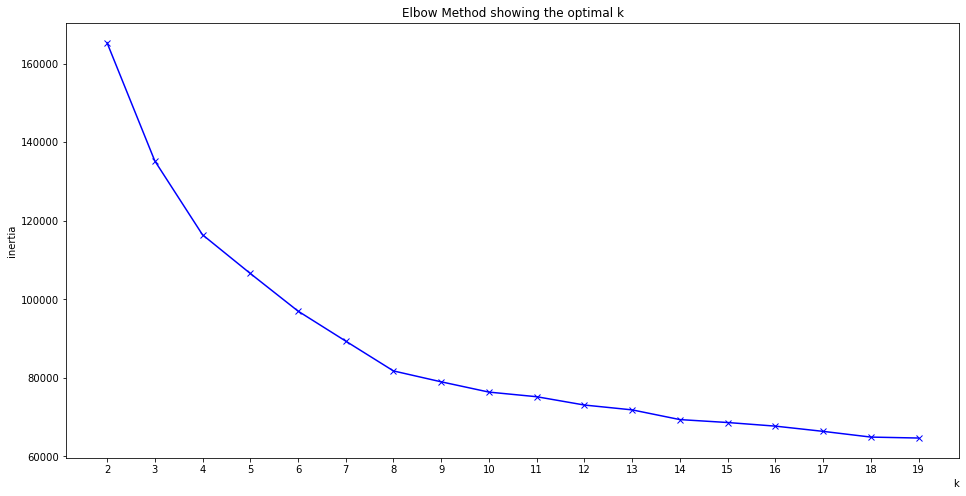

In [15]:
K = range(2, 20)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k', loc='right')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

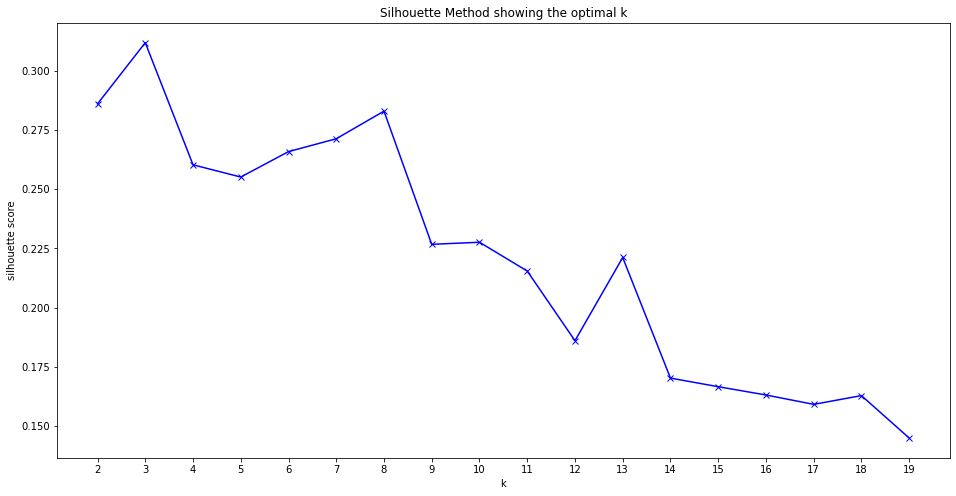

In [16]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [17]:
#scaler = StandardScaler()
#model = KMeans()

with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [18]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [19]:
scaler2 = load('kmeans_4.pickle')

In [20]:
display(scaler2)

KMeans(n_clusters=19, random_state=1234)